In [91]:
from MLDA.jupyter_DA.EnergyBuilding import data
from MLDA.jupyter_DA.EnergyBuilding import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor;

In [40]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [73]:
X = data.iloc[:,:-2].to_numpy()
y1 = data['Y1'].to_numpy()
y2 = data['Y2'].to_numpy()
X_train1, X_test1, y1_train, y1_test = train_test_split(X, y1, test_size=.24, random_state=1)
X_train1.shape[1]

8

In [42]:
rancac = RANSACRegressor(min_samples=50, random_state=0)
forest = RandomForestRegressor(n_estimators=1000, criterion='mse')

rancac.fit(X_train1, y1_train)
forest.fit(X_train1, y1_train)
y1_train_pred_ransac, y1_test_pred_ransac = rancac.predict(X_train1), rancac.predict(X_test1)
y1_train_pred_forest, y1_test_pred_forest = forest.predict(X_train1), forest.predict(X_test1)


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=50, random_state=0, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
print(f"MSE\ntrain ransac/forest: {mean_squared_error(y1_train, y1_train_pred_ransac):.3}/{mean_squared_error(y1_train, y1_train_pred_forest):.3} \ntest ransac/forest: {mean_squared_error(y1_test, y1_test_pred_ransac):.3}/{mean_squared_error(y1_test, y1_test_pred_forest):.3}")
print(f"R^2\ntrain ransac/forest: {r2_score(y1_train, y1_train_pred_ransac):.4}/{r2_score(y1_train, y1_train_pred_forest):.4} \ntest ransac/forest: {r2_score(y1_test, y1_test_pred_ransac):.4}/{r2_score(y1_test, y1_test_pred_forest):.4}")


MSE
train ransac/forest: 8.0/0.035 
test ransac/forest: 10.9/0.254
R^2
train ransac/forest: 0.9209/0.9997 
test ransac/forest: 0.8917/0.9975


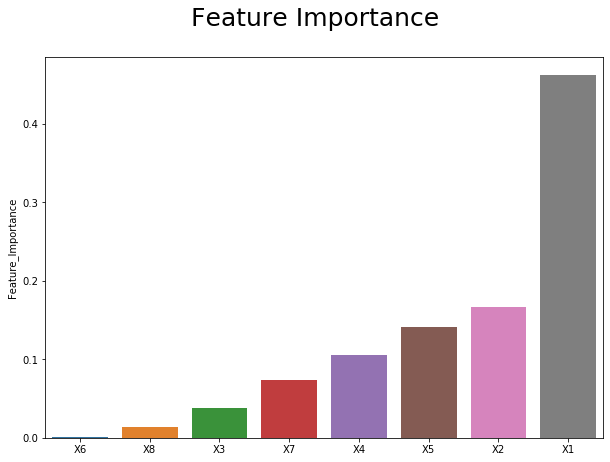

In [99]:
#Feature importance
importance = forest.feature_importances_
col_names = data.iloc[:,:-2].columns.to_list()
df_importance = pd.DataFrame(np.array(importance), index=col_names, columns=['Feature_Importance'])
# df_importance.sum()

sorted_ = df_importance.sort_values(by='Feature_Importance')
# sorted_.index
# type(sorted_)
fig, axs = plt.subplots(figsize=(10,7))
sns.barplot(y='Feature_Importance', x=sorted_.index, data=sorted_, ax=axs)
fig.suptitle('Feature Importance', fontsize=25);

In [ ]:
# Plottimg residuals

